In [1]:
import functions as func
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import numpy as np
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

In [2]:
register_matplotlib_converters()
data = pd.read_csv('data/pd_speech_features.csv', skiprows=[0])
data = data.drop(['id'], axis=1)
data.shape

(756, 754)

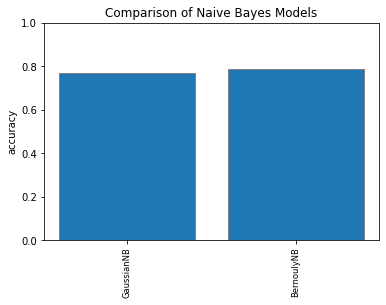

In [3]:
estimators = {'GaussianNB': GaussianNB(),  
              'BernoulyNB': BernoulliNB()}
tts = func.split_dataset(data)
xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(tts[0], tts[1])
    vprdY = estimators[clf].predict(tts[2])
    yvalues.append(metrics.accuracy_score(tts[3], vprdY))


plt.figure()
func.bar_chart(plt.gca(), xvalues, yvalues, 'Comparison of Naive Bayes Models', '', 'accuracy', percentage=True)
plt.show()


tr:  1 	 acc:  0.7929515418502202 	 recall:  0.9940828402366864 	 precision 0.7850467289719626
tr:  0.9 	 acc:  0.7797356828193832 	 recall:  0.9763313609467456 	 precision 0.7819905213270142
tr:  0.8 	 acc:  0.8193832599118943 	 recall:  0.9822485207100592 	 precision 0.8137254901960784


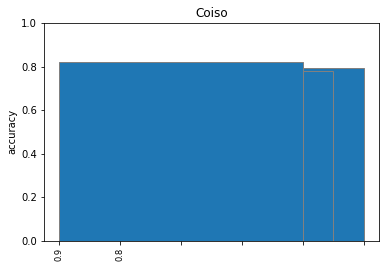

In [4]:
#thresholds = [1,0.9,0.8, 0.75, 0.7, 0.65, 0.6]
thresholds = [1,0.9,0.8]


xvalues = []
yvalues = []
for tr in thresholds:
    clf = BernoulliNB()
    corr_data = func.red_correlations(data, tr=tr)
    tts = func.split_dataset(corr_data)
    xvalues.append(tr)
    clf.fit(tts[0], tts[1])
    prdY = clf.predict(tts[2])
    print("tr: ",tr,"\t acc: ",metrics.accuracy_score(tts[3], prdY), 
          "\t recall: ", metrics.recall_score(tts[3], prdY),
         "\t precision", metrics.precision_score(tts[3], prdY))
    yvalues.append(metrics.accuracy_score(tts[3], prdY))


plt.figure()
func.bar_chart(plt.gca(), xvalues, yvalues, 'Coiso', '', 'accuracy', percentage=True)
plt.show()

## vamos com 0.75 de threshold

In [5]:
corr_data = func.red_correlations(data, tr=0.75)
corr_data.shape

(756, 590)

In [7]:
data_norm = func.normalize(corr_data, ['class','gender'])
data_norm.head()

,DFA,Ea,Ea2,Ed2_10_coefMean,Ed2_10_coefMedian,Ed2_10_coefStd,Ed2_4_coef,Ed2_5_coef,Ed2_6_coef,Ed2_8_coef,...,tqwt_stdValue_dec_3,tqwt_stdValue_dec_32Mean,tqwt_stdValue_dec_32Median,tqwt_stdValue_dec_32Std,tqwt_stdValue_dec_5Mean,tqwt_stdValue_dec_5Median,tqwt_stdValue_dec_5Std,tqwt_stdValue_dec_7,class,gender
0,6.414660e-10,8.930797e-08,8.930833e-08,2.004430e-08,3.896254e-12,4.008340e-08,8.082404e-16,3.920636e-15,5.099506e-16,1.027046e-15,...,2.439636e-13,7.911869e-12,8.136257e-12,4.331517e-12,3.593407e-12,3.348437e-12,3.451148e-12,2.025691e-12,1,1
1,6.515166e-10,9.376884e-08,9.376903e-08,8.969449e-10,1.816728e-13,1.793647e-09,1.275259e-15,1.912888e-15,1.500305e-15,3.056870e-15,...,3.464953e-13,1.785993e-11,1.825120e-11,1.184738e-11,1.620235e-11,1.485181e-11,1.746660e-11,1.435041e-12,1,1
2,6.537314e-10,9.670001e-08,9.670011e-08,1.449521e-09,3.107941e-13,2.898627e-09,1.411822e-15,1.025021e-15,1.460172e-15,5.782666e-17,...,2.026834e-13,1.582277e-11,1.569153e-11,1.107572e-11,3.055635e-12,2.502899e-12,3.095180e-12,1.280406e-12,1,1
3,1.023309e-09,1.272615e-07,1.284060e-07,2.332905e-05,4.089793e-09,4.665265e-05,1.574677e-12,2.356107e-12,3.302583e-12,8.638759e-12,...,2.203520e-12,1.863947e-10,1.846456e-10,1.139026e-10,4.013656e-11,3.603415e-11,4.115896e-11,4.081830e-12,1,0
4,8.196760e-10,1.013967e-07,1.026923e-07,5.867551e-05,1.050444e-08,1.173370e-04,1.981228e-12,1.099210e-12,2.054173e-12,4.500400e-12,...,2.133899e-12,1.658297e-10,2.035166e-10,8.359980e-11,1.456169e-11,1.224660e-11,1.361822e-11,2.927767e-12,1,0


In [ ]:
columns = ['class']
rows, cols = func.choose_grid(len(columns))
cols=2
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    counts = data_norm[columns[n]].dropna().value_counts(normalize=True)
    func.bar_chart(axs[i, j], counts.index, counts.values, 'Histogram for %s'%columns[n], columns[n], 'probability')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

## Unbalanced dataset
## Undersample está fora de questão

In [ ]:
data_smote =func.smote_split(data_norm, 'class')
print(data_smote[0].shape, data_smote[1].shape, data_smote[2].shape, data_smote[3].shape)

In [ ]:
target_count = corr_data['class'].value_counts()
min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

values = {'Original': [target_count.values[ind_min_class], target_count.values[1-ind_min_class]]}

df_class_min = corr_data[corr_data['class'] == min_class]
df_class_max = corr_data[corr_data['class'] != min_class] 

data_over = df_class_min.sample(len(df_class_max), replace=True)

data_over = df_class_max.append(data_over)
data_over.shape

In [ ]:
##MAAAAAAAAAALLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL

def over_split(unba,  to_clf='class'):
    columns = unba.columns
    data = unba.copy()
    
    y1: np.ndarray = data['class'].values 
    X1: np.ndarray = data.drop('class', axis=1).values
    labels1 = pd.unique(y1)
    trnX1, tstX1, trnY1, tstY1 = train_test_split(X1, y1, train_size=0.7, stratify=y1)
    trnY1 = trnY1.reshape((-1, 1))
    tstY1 = tstY1.reshape((-1, 1))
    train = np.append(trnX1, trnY1, axis=1)
    
    data = pd.DataFrame(train,columns=columns)
    print(data.shape)
    ###########################################

    ###################################
    target_count = data[to_clf].value_counts()
    min_class = target_count.idxmin()
    ind_min_class = target_count.index.get_loc(min_class)

    values = {'Original': [target_count.values[ind_min_class], target_count.values[1-ind_min_class]]}

    df_class_min = data[data[to_clf] == min_class]
    df_class_max = data[data[to_clf] != min_class] 
    
    df_over = df_class_min.sample(len(df_class_max), replace=True)
    df_over = df_class_max.append(df_over)
    data = df_over
    
    y1: np.ndarray = data['class'].values 
    X1: np.ndarray = data.drop('class', axis=1).values
    y1 = y1.reshape((-1, 1))

    
    return (X1, y1, tstX1, tstY1, labels1)

data_over = over_split(corr_data, 'class')
print(data_over[0].shape, data_over[1].shape, data_over[2].shape, data_over[3].shape)

In [ ]:
clf = BernoulliNB()
#d = func.split_dataset(data_smote)
# (trnX, trnY, tstX, tstY, labels)
d=data_smote

xvalues = ["dataset1"]
yvalues = []
cnf_mtx = []
clf.fit(d[0], d[1])
prdY = clf.predict(d[2])
yvalues.append(metrics.accuracy_score(d[3], prdY))
cnf_mtx.append(metrics.confusion_matrix(d[3], prdY, d[4]))

plt.figure()
func.plot_confusion_matrix(plt.gca(), cnf_mtx[0], d[4])
plt.show()

plt.figure()
func.bar_chart(plt.gca(), xvalues, yvalues, 'Comparison of Datasets', '', 'accuracy', percentage=True)
plt.show()

### Canto superior esquerdo representa falsos negativos, ou seja, tem a doença mas o classificafor diz que não. Visto que este é o cenário mais grave vamos dar mais importância a este valor e optar pelo Oversampling.

In [ ]:
clf = BernoulliNB()

func.compare_datasets(clf, data_smote, data_smote)

### Normalização melhora

In [ ]:
nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
dist = ['manhattan', 'euclidean', 'chebyshev']
values = {}
tts = func.split_dataset(data_norm)

for d in dist:
    yvalues = []
    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(tts[0], tts[1])
        prdY = knn.predict(tts[2])
        yvalues.append(metrics.accuracy_score(tts[3], prdY))
    values[d] = yvalues

plt.figure()
func.multiple_line_chart(plt.gca(), nvalues, values, 'KNN variants', 'n', 'accuracy', percentage=True)
plt.show()

## Testar com k-fold

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=13)
yvalues=[]
X = data_norm[data_norm.columns.difference(['class'])].values
y = data_norm['class'].values

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    prdY = clf.predict(X_test)
    yvalues.append(metrics.accuracy_score(y_test, prdY))

print(yvalues)


In [ ]:
tuplo=(2,4,23,76,3)

def coiso(tuplo):
    maior = 0
    for i in range(len(tuplo)): 
        if tuplo[i] > tuplo[maior]:
            maior = i
    return maior

coiso(tuplo)     